## Midterm Exam : Solutions - Bhagyashri Patil

**Importing NLTK:**

In [146]:
import nltk
nltk.download('book', quiet=True)

True

---------------------------------------------------------------------------

Q.1) What are the 10 most frequent word **four-grams** (include punctuation, but count upper- and lower-case words as the same) in the Brown corpus?

**Importing N-grams :**

In [147]:
from nltk import ngrams

**Normalizing Corpus for : Upper and Lower case words**

In [148]:
def normalize(tokens):
  return [w.lower() for w in tokens]

In [149]:
brown_words = normalize(nltk.corpus.brown.words())

**Importing Counter :**

In [150]:
from collections import Counter

**Defining Four-Grams :**

In [151]:
four_gram_words_counter = Counter(nltk.ngrams(brown_words,4))

**Ten most Frequent word Four-grams :**

In [152]:
four_gram_words_counter.most_common(10)

[(("''", '?', '?', '``'), 352),
 (("''", ',', 'he', 'said'), 196),
 ((',', 'of', 'course', ','), 161),
 (('of', 'the', 'united', 'states'), 111),
 ((',', 'he', 'said', ','), 103),
 ((',', 'he', 'said', '.'), 90),
 (("''", ',', 'she', 'said'), 88),
 (('at', 'the', 'same', 'time'), 87),
 ((',', 'for', 'example', ','), 84),
 (("''", '?', '?', 'he'), 80)]

**Answer :** As we have included the punctuation, we get the above **Top 10 Four-grams** from the Brown Corpus.

---------------------------------------------------------------------------

Q.2) In morphology, the **productivity** of an affix is its potential to be used to create new words. The English suffixes *-ity* and *-ness* can both be used to form nouns from adjectives, but *-ness* is much more productive since it's easier to make new words with: compare something like *straightforwardness* vs. *straightforwardity*. In section 9.1.1.3, Stefanowitsch discusses a method for measuring the productivity of an affix that uses the number of word types with that affix that are hapax legomena, or words that occur exactly once in a corpus. To compare their productivity, write a program that finds the number of hapax legomena ending in *-ity* and in *-ness* in the Brown corpus (counting upper and lower case as equivalent).

**Normalizing Corpus for : Upper and Lower case words**

In [153]:
def normalize(tokens):
  return [w.lower() for w in tokens]

In [154]:
brown_words = normalize(nltk.corpus.brown.words())

**Words ending with 'ity' or '-ity' :**

In [155]:
brown_words_ity = [w for w in brown_words if (w.endswith('ity')) or (w.endswith('-ity'))]

**Total Length of Resultant Corpus whose words are ending with 'ity' or '-ity' :**

In [156]:
len(brown_words_ity)

4010

**Counting Frequency of words ending with 'ity' or '-ity' :**

In [157]:
brown_words_ity_freq = nltk.FreqDist(brown_words_ity)

**Words which occur ONLY Once and ending with 'ity' or '-ity' :**

In [158]:
hapax_legomena_ity = [w for w in brown_words_ity_freq if brown_words_ity_freq[w] == 1]

**Total Words with Hapax Legomena 'ity' or '-ity' :**

In [159]:
len(hapax_legomena_ity)

163

**Words ending with 'ness' or '-ness' :**

In [160]:
brown_words_ness = [w for w in brown_words if (w.endswith('ness')) or (w.endswith('-ness'))]

**Total Length of Resultant Corpus whose words are ending with 'ness' or '-ness' :**

In [161]:
len(brown_words_ness)

1464

**Counting Frequency of words ending with 'ness' or '-ness' :**

In [162]:
brown_words_ness_freq = nltk.FreqDist(brown_words_ness)

**Words which occur ONLY Once and ending with 'ness' or '-ness' :**

In [163]:
hapax_legomena_ness = [w for w in brown_words_ness_freq if brown_words_ness_freq[w] == 1]

**Total Words with Hapax Legomena 'ness' or '-ness' :**

In [164]:
len(hapax_legomena_ness)

180

**Observation:** From above, its clear that **Hapax Legomena** of affix **'ness'** is **180** and **Hapax Legomena** of affix **'ity'** is **163**, which is less than that of affix 'ness'. For **calculating** their **Productivity**, we need to find the **Hapax-Token Ratio (HTR)** for both the affixes.

HTR is given by:


$$\mathit{Hapax-Token Ratio (HTR)}=\frac{\textrm{# of hapax legomena}}{\textrm{# of tokens}}$$

**Hapax-Token Ratio (HTR) of 'ity' or '-ity' :**

In [165]:
HTR_ity = len(hapax_legomena_ity) / len(brown_words_ity)
HTR_ity

0.04064837905236908

**Hapax-Token Ratio (HTR) of 'ness' or '-ness' :**

In [166]:
HTR_ness = len(hapax_legomena_ness) / len(brown_words_ness)
HTR_ness

0.12295081967213115

**Answer:** The **Productivity** of affix **'-ness'** is **12.3%** whereas the productivity of **'-ity'** is **4.1%**.

It is clear from the above **Hapax-Token Ratio (HTR)** values that **'-ness'** is **much more productive** than **'-ity'**, which presumably matches the intuition of most speakers of English. Also **we can make new words easily with** the affix **'-ness'** as compared to the affix '-ity'.

---------------------------------------------------------------------------

Q.3) The word *facetiously* is unusual in that it contains the vowels *...a...e...i...o...u...y...*, in that order, with no other vowels (counting *y* as a vowel). What other word(s) in `nltk.corpus.words.words()` have that property?

**Importing Regular Expressions & Words Corpus :**

In [167]:
from nltk.corpus import words
import re

In [168]:
words_corpus = nltk.corpus.words.words()

**Checking for Vowel sequences :**

In [169]:
sequences_vowels = [w for w in words_corpus if re.search(r'[^aeiouy]*a[^aeiouy]*e[^aeiouy]*i[^aeiouy]*o[^aeiouy]*u[^aeiouy]*y', w)]

In [170]:
sequences_vowels

['abstemiously', 'facetiously']

**Answer:** We have total of **2 Words**, which have the vowel sequence in the exact way as 'aeiouy'. those words are **'abstemiously'** and **'facetiously'**.

---------------------------------------------------------------------------

Q.4) Find the 10 bigrams with the **highest PMI value** in the treebank corpus, ignoring case distinctions. Only consider bigrams that occur more than 10 times and which consist of words on the basic English word list `nltk.corpus.words.words('en-basic')`. For example, *wall street* would count, but *malignant mesothelioma* wouldn't (it's too rare), nor would *south korea* (*korea* isn't on the basic word list).

**Importing Collocations :**

In [171]:
from nltk.collocations import *

**Assigning the Bigram measures :**

In [172]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

**Checking if the words from 'Treebank' corpus are present in 'en-basic' corpus :**

In [173]:
finder = BigramCollocationFinder.from_words(w.lower() for w in nltk.corpus.treebank.words() if w in nltk.corpus.words.words("en-basic"))

**Applying the frequency filter :**

In [174]:
finder.apply_freq_filter(10)

**Top 10 Bigrams with the highest PMI value :**

In [175]:
finder.nbest(bigram_measures.pmi, 10)

[('general', 'manager'),
 ('same', 'time'),
 ('first', 'time'),
 ('last', 'week'),
 ('last', 'year'),
 ('there', 'no'),
 ('this', 'week'),
 ('as', 'well'),
 ('such', 'as'),
 ('i', 'do')]

**Answer:** The above are the **Top 10 Bi-grams** with the **sorting order** as of the **highest PMI value**.

---------------------------------------------------------------------------

Q.5) Draw **Mendenhall's Characteristic Curves of Composition** for the first 10,000 tokens (skipping punctuation) of the 'romance', 'mystery', 'learned', and 'government' sections of the Brown corpus. As shown in the class notes, your plots should show frequency by word length (the number of 1 letter words, the number of 2 letter words, etc.). What, if anything, do these curves tell us about the texts?


**Importing Libraries :**

In [176]:
from toolz import *

**Creating Brown Corpus for filtered Categories :**

In [177]:
brown_romance = nltk.corpus.brown.words(categories= 'romance')

brown_mystery = nltk.corpus.brown.words(categories= 'mystery')

brown_learned = nltk.corpus.brown.words(categories= 'learned')

brown_government = nltk.corpus.brown.words(categories='government')

**Normalizing Corpus for : Upper and Lower case words & Removing Punctuation :**

In [178]:
brown_corpus_romance = [w.lower() for w in brown_romance[:10000] if (w.isalpha())]

brown_corpus_mystery = [w.lower() for w in brown_mystery[:10000] if (w.isalpha())]

brown_corpus_learned = [w.lower() for w in brown_learned[:10000] if (w.isalpha())]

brown_corpus_government = [w.lower() for w in brown_government[:10000] if (w.isalpha())]

**Frequency of words for filtered Categories :**

In [179]:
len_romance_words = []
for i in brown_corpus_romance:
  len_romance_words.append(len(i))

freq_romance = nltk.FreqDist(len_romance_words)

In [180]:
len_mystery_words = []
for i in brown_corpus_mystery:
  len_mystery_words.append(len(i))

freq_mystery = nltk.FreqDist(len_mystery_words)

In [181]:
len_learned_words = []
for i in brown_corpus_learned:
  len_learned_words.append(len(i))

freq_learned = nltk.FreqDist(len_learned_words)

In [182]:
len_government_words = []
for i in brown_corpus_government:
  len_government_words.append(len(i))

freq_government = nltk.FreqDist(len_government_words)

**Importing Matplotlib & Numpy Libraries :**

In [183]:
import matplotlib.pyplot as plt
import numpy as np

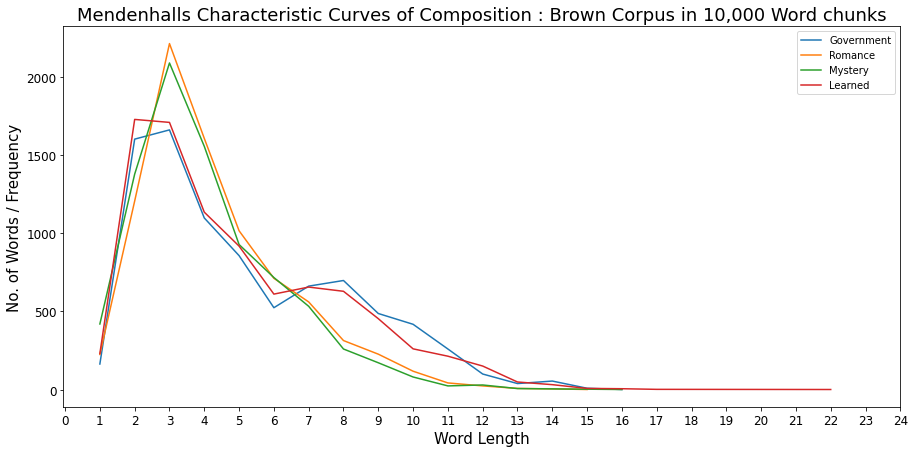

In [184]:
plt.figure(figsize=(15,7))

plt.plot(*zip(*sorted(dict(freq_government).items())), label = "Government")
plt.plot(*zip(*sorted(dict(freq_romance).items())), label = "Romance")
plt.plot(*zip(*sorted(dict(freq_mystery).items())), label = "Mystery")
plt.plot(*zip(*sorted(dict(freq_learned).items())), label = "Learned")

plt.xlabel("Word Length", fontsize = 15)
plt.xticks(np.arange(0,25,1))
plt.tick_params(axis='x', which='major', labelsize = 12)

plt.ylabel("No. of Words / Frequency", fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize = 12)

plt.title("Mendenhalls Characteristic Curves of Composition : Brown Corpus in 10,000 Word chunks", fontsize = 18)
plt.legend()
plt.show() 

**Observation & Description:**

1) But as we observe deeply for the trend, we notice that as the word length increases, gradually the number of words/frequency decreases.

2) In Higher overview, the overall trend for all the Brown categories 'Romance' and 'Mystery' are approximately similar to each other whereas the curve for 'Learned' and 'Government' is approximately similar to each other.

3) Maximum words of categories 'Romance' and 'Mystery' exhibit the word length of 3.

4) Maximum words of categories 'Learned' and 'Government' exhibit the word length of 2.

5) The maximum length of word is 22 and it is present into the 'Learned' category of the Brown Corpus.

6) Overall, the entire graph collectively for all the categories represent the similar structure of the trend. That is it shoots high at start and then suddenly drops going ahead.


---------------------------------------------------------------------------